# Transportation Accessibility of Fresno, CA
---

### Attributions

| Details                                                                                     |                                                                                           |
|---------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------|
| **Author**                                                                                  | Robert Lopez                                                                              |
| **Published**                                                                               | 12/18/2024                                                                                |
| **Email**                                                                                   | robertjlopez444@gmail.com                                                                 |
| **GitHub**                                                                                  | [https://github.com/robertl0500](https://github.com/robertl0500)                          |

### Data

| Source                           | Links                                                                                                     |
|----------------------------------|-----------------------------------------------------------------------------------------------------------|
| City of Fresno GIS Hub           | [https://city-of-fresno-gis-hub-cityoffresno.hub.arcgis.com/](https://city-of-fresno-gis-hub-cityoffresno.hub.arcgis.com/) |
| Census ACS 5-Year Data (2022)    | [https://www.census.gov/data/developers/data-sets/acs-5year.2022.html#list-tab-1806015614](https://www.census.gov/data/developers/data-sets/acs-5year.2022.html#list-tab-1806015614) |
| *This product uses the Census Bureau Data API but is not endorsed or certified by the Census Bureau*|
| California Open Data Portal | [https://data.ca.gov/group/transportation?page=1](https://data.ca.gov/group/transportation) |
| California State Geoportal | [https://gis.data.ca.gov/](https://gis.data.ca.gov/)
| General Transit Feed Specification Reference | https://gtfs.org/documentation/schedule/reference/
| ArcGIS Online Story Map | [https://storymaps.arcgis.com](https://storymaps.arcgis.com/stories/7751a3e5091644a2a9d168613c3a2e34)

### Geographic Boundaries

In [1]:
import geopandas as gpd

In [2]:
county = gpd.read_file('./data/fresno_tract_2020.geojson')

county.head()

,ObjectID,Name,NameLSAD,StateFP,CountyFP,TractCE,MTFCC,FuncStat,ALand,AWater,GeoID,Latitude,Longitude,geometry
0,1,2,Census Tract 2,06,019,000200,G5020,S,1988144,0,06019000200,+36.7354931,-119.8055062,"POLYGON ((-119.81307 36.73994, -119.81303 36.7..."
1,2,44.09,Census Tract 44.09,06,019,004409,G5020,S,2929252,9414,06019004409,+36.8437897,-119.8119280,"POLYGON ((-119.82635 36.83729, -119.82635 36.8..."
2,3,42.14,Census Tract 42.14,06,019,004214,G5020,S,2479195,38951,06019004214,+36.8284596,-119.8539491,"POLYGON ((-119.86256 36.82287, -119.86256 36.8..."
3,4,56.08,Census Tract 56.08,06,019,005608,G5020,S,1469711,19689,06019005608,+36.8121110,-119.7200348,"POLYGON ((-119.73333 36.80854, -119.73254 36.8..."
4,5,55.18,Census Tract 55.18,06,019,005518,G5020,S,3235052,0,06019005518,+36.8604181,-119.6445588,"POLYGON ((-119.65694 36.85238, -119.65693 36.8..."


In [3]:
county.columns.values

array(['ObjectID', 'Name', 'NameLSAD', 'StateFP', 'CountyFP', 'TractCE',
       'MTFCC', 'FuncStat', 'ALand', 'AWater', 'GeoID', 'Latitude',
       'Longitude', 'geometry'], dtype=object)

In [4]:
county.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

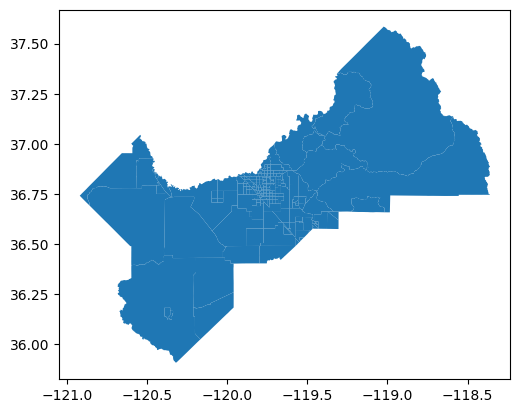

In [5]:
county.plot()

In [6]:
city = gpd.read_file('./data/fresno_boundary.geojson')

city.head()

,ObjectID,Label,geometry
0,1,city,"MULTIPOLYGON (((-119.70008 36.73065, -119.7000..."


In [7]:
city.columns.values

array(['ObjectID', 'Label', 'geometry'], dtype=object)

In [8]:
city.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

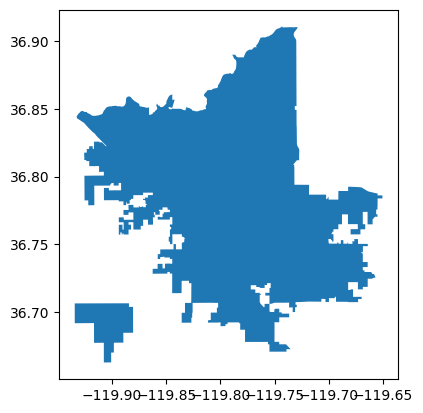

In [9]:
city.plot()

In [10]:
intersection = gpd.sjoin(county, city, how='inner', predicate='intersects')

intersection.columns.values

array(['ObjectID_left', 'Name', 'NameLSAD', 'StateFP', 'CountyFP',
       'TractCE', 'MTFCC', 'FuncStat', 'ALand', 'AWater', 'GeoID',
       'Latitude', 'Longitude', 'geometry', 'index_right',
       'ObjectID_right', 'Label'], dtype=object)

<Axes: >

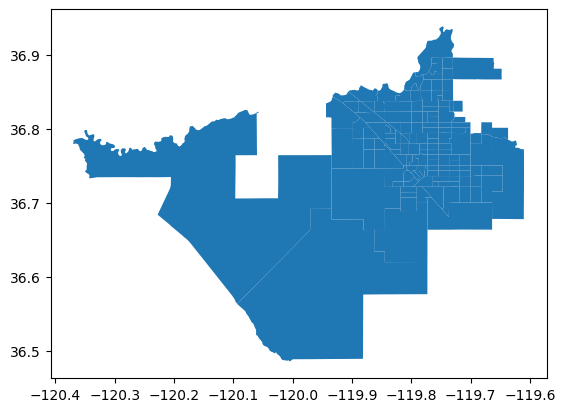

In [11]:
intersection.plot()

In [12]:
intersection = intersection.drop(columns=['ObjectID_left', 'ObjectID_right', 
                                          'index_right', 'Label']).reset_index(drop=True)

intersection.head()

,Name,NameLSAD,StateFP,CountyFP,TractCE,MTFCC,FuncStat,ALand,AWater,GeoID,Latitude,Longitude,geometry
0,2,Census Tract 2,06,019,000200,G5020,S,1988144,0,06019000200,+36.7354931,-119.8055062,"POLYGON ((-119.81307 36.73994, -119.81303 36.7..."
1,44.09,Census Tract 44.09,06,019,004409,G5020,S,2929252,9414,06019004409,+36.8437897,-119.8119280,"POLYGON ((-119.82635 36.83729, -119.82635 36.8..."
2,42.14,Census Tract 42.14,06,019,004214,G5020,S,2479195,38951,06019004214,+36.8284596,-119.8539491,"POLYGON ((-119.86256 36.82287, -119.86256 36.8..."
3,56.08,Census Tract 56.08,06,019,005608,G5020,S,1469711,19689,06019005608,+36.8121110,-119.7200348,"POLYGON ((-119.73333 36.80854, -119.73254 36.8..."
4,55.25,Census Tract 55.25,06,019,005525,G5020,S,21713660,0,06019005525,+36.8804762,-119.6918669,"POLYGON ((-119.72992 36.89557, -119.72992 36.8..."


<Axes: >

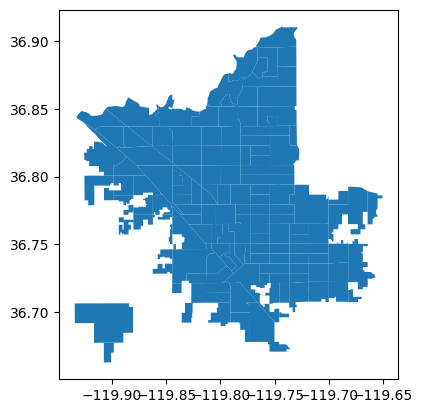

In [13]:
fresno = intersection.clip(city)
fresno.plot()

In [14]:
fresno.geometry.geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [15]:
fresno.fillna(0, inplace=True)

fresno.head()

,Name,NameLSAD,StateFP,CountyFP,TractCE,MTFCC,FuncStat,ALand,AWater,GeoID,Latitude,Longitude,geometry
109,76,Census Tract 76,06,019,007600,G5020,S,356819985,0,06019007600,+36.5805660,-119.9430164,"POLYGON ((-119.91491 36.67723, -119.9116 36.67..."
111,39,Census Tract 39,06,019,003900,G5020,S,456644747,1669531,06019003900,+36.7082365,-120.1192112,"MULTIPOLYGON (((-119.93439 36.70631, -119.9344..."
121,86,Census Tract 86,06,019,008600,G5020,S,74215767,28843,06019008600,+36.7100325,-119.8851173,"MULTIPOLYGON (((-119.84429 36.74626, -119.8442..."
127,7.01,Census Tract 7.01,06,019,000701,G5020,S,1242800,47342,06019000701,+36.7266453,-119.8243614,"POLYGON ((-119.83116 36.72487, -119.83114 36.7..."
128,7.02,Census Tract 7.02,06,019,000702,G5020,S,6833252,157822,06019000702,+36.7363393,-119.8277278,"POLYGON ((-119.84443 36.72829, -119.84443 36.7..."


In [16]:
# fresno_dissolved = fresno.dissolve(by='Name')

In [17]:
# fresno_dissolved.plot()

In [18]:
fresno.columns.values

array(['Name', 'NameLSAD', 'StateFP', 'CountyFP', 'TractCE', 'MTFCC',
       'FuncStat', 'ALand', 'AWater', 'GeoID', 'Latitude', 'Longitude',
       'geometry'], dtype=object)

In [19]:
col = ['GeoID', 'StateFP', 'CountyFP', 'TractCE']

In [20]:
fresno = fresno[col + ['geometry']]

fresno.head()

,GeoID,StateFP,CountyFP,TractCE,geometry
109,06019007600,06,019,007600,"POLYGON ((-119.91491 36.67723, -119.9116 36.67..."
111,06019003900,06,019,003900,"MULTIPOLYGON (((-119.93439 36.70631, -119.9344..."
121,06019008600,06,019,008600,"MULTIPOLYGON (((-119.84429 36.74626, -119.8442..."
127,06019000701,06,019,000701,"POLYGON ((-119.83116 36.72487, -119.83114 36.7..."
128,06019000702,06,019,000702,"POLYGON ((-119.84443 36.72829, -119.84443 36.7..."


### Extracting ACS Variables

In [21]:
variables = ['B01001_001E', 'B01001_002E', 'B01001_026E', 'B01002_001E', 'B01002_002E', 'B01002_003E',
             'B02001_002E', 'B02001_003E', 'B03003_003E', 'B02001_005E', 'B02001_004E', 'B02001_006E', 
             'B19013_001E', 'B19301_001E', 'B18105_002E']

csvar = ','.join(variables)

In [22]:
from functions.census_api import api_key
import requests

stateFP = '06'

countyFP = '019'

url = f'https://api.census.gov/data/2020/acs/acs5?get=NAME,{csvar}&for=tract:*&in=state:{stateFP}+county:{countyFP}&key={api_key}'

response = requests.get(url)

response #200 - Successful, 204 - Missing, 400 - Error

<Response [200]>

### Creating DataFrame with ACS Variables

In [23]:
import pandas as pd
from functions.json_df import json_to_dataframe

json_to_dataframe(response).head()

,NAME,B01001_001E,B01001_002E,B01001_026E,B01002_001E,B01002_002E,B01002_003E,B02001_002E,B02001_003E,B03003_003E,B02001_005E,B02001_004E,B02001_006E,B19013_001E,B19301_001E,B18105_002E,state,county,tract
0,"Census Tract 55.07, Fresno County, California",5559,2626,2933,36.3,35.1,38.6,3496,252,1734,727,21,0,101563,52693,2473,06,019,005507
1,"Census Tract 55.08, Fresno County, California",6103,2823,3280,39.1,41.4,37.7,3620,81,1500,1827,0,0,101463,41477,2661,06,019,005508
2,"Census Tract 55.09, Fresno County, California",5010,2380,2630,36.5,37.0,36.2,3321,101,1001,890,110,16,87019,33049,2200,06,019,005509
3,"Census Tract 55.12, Fresno County, California",6094,2903,3191,31.7,31.7,31.8,4554,38,1913,747,53,0,89534,32488,2739,06,019,005512
4,"Census Tract 55.13, Fresno County, California",2860,1394,1466,41.8,38.9,44.2,2011,61,536,553,15,0,125924,90231,1289,06,019,005513


In [24]:
data = response.json()

acs_df = pd.DataFrame(data[1:], columns=data[0])

In [25]:
acs_df = acs_df.rename(columns={
    'B01001_001E': 'Total_Pop',
    'B01001_002E': 'Total_Male',
    'B01001_026E': 'Total_Female',
    'B01002_001E': 'Total_Median_Age',
    'B01002_002E': 'Male_Median_Age',
    'B01002_003E': 'Female_Median_Age',
    'B02001_002E': 'Total_White',
    'B02001_003E': 'Total_Black',
    'B03003_003E': 'Total_Hispanic_Latino',
    'B02001_005E': 'Total_Asian',
    'B02001_004E': 'Total_AmericanIndian_AlaskanNative',
    'B02001_006E': 'Total_NativeHawaiian_PacificIslander',
    'B19013_001E': 'Median_Household_Income',
    'B19301_001E': 'Per_Capita_Income',
    'B18105_002E': 'Ambulatory_Disability'
})

In [26]:
tracts = pd.merge(acs_df, fresno, left_on='tract', right_on='TractCE', how='inner')

acs = gpd.GeoDataFrame(tracts, geometry='geometry')

acs.head()

,NAME,Total_Pop,Total_Male,Total_Female,Total_Median_Age,Male_Median_Age,Female_Median_Age,Total_White,Total_Black,Total_Hispanic_Latino,...,Per_Capita_Income,Ambulatory_Disability,state,county,tract,GeoID,StateFP,CountyFP,TractCE,geometry
0,"Census Tract 55.07, Fresno County, California",5559,2626,2933,36.3,35.1,38.6,3496,252,1734,...,52693,2473,06,019,005507,06019005507,06,019,005507,"POLYGON ((-119.76521 36.86642, -119.76507 36.8..."
1,"Census Tract 55.08, Fresno County, California",6103,2823,3280,39.1,41.4,37.7,3620,81,1500,...,41477,2661,06,019,005508,06019005508,06,019,005508,"POLYGON ((-119.74778 36.85594, -119.74778 36.8..."
2,"Census Tract 55.09, Fresno County, California",5010,2380,2630,36.5,37.0,36.2,3321,101,1001,...,33049,2200,06,019,005509,06019005509,06,019,005509,"POLYGON ((-119.74778 36.85065, -119.74776 36.8..."
3,"Census Tract 55.16, Fresno County, California",5975,3057,2918,37.5,34.2,41.2,4727,116,1935,...,54866,2836,06,019,005516,06019005516,06,019,005516,"POLYGON ((-119.7793 36.86754, -119.77928 36.86..."
4,"Census Tract 55.25, Fresno County, California",1199,687,512,41.8,30.4,49.5,953,35,143,...,52246,631,06,019,005525,06019005525,06,019,005525,"POLYGON ((-119.7299 36.88143, -119.72991 36.88..."


<Axes: >

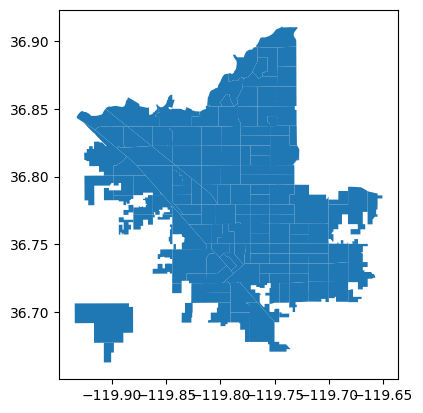

In [27]:
acs.plot()

In [28]:
acs.columns.values

array(['NAME', 'Total_Pop', 'Total_Male', 'Total_Female',
       'Total_Median_Age', 'Male_Median_Age', 'Female_Median_Age',
       'Total_White', 'Total_Black', 'Total_Hispanic_Latino',
       'Total_Asian', 'Total_AmericanIndian_AlaskanNative',
       'Total_NativeHawaiian_PacificIslander', 'Median_Household_Income',
       'Per_Capita_Income', 'Ambulatory_Disability', 'state', 'county',
       'tract', 'GeoID', 'StateFP', 'CountyFP', 'TractCE', 'geometry'],
      dtype=object)

In [29]:
col2 = ['NAME','StateFP','CountyFP', 'TractCE', 'Total_Pop', 'Total_Male', 'Total_Female', 
       'Total_Median_Age', 'Male_Median_Age', 'Female_Median_Age', 'Total_White',
       'Total_Black', 'Total_Hispanic_Latino', 'Total_Asian',
       'Total_AmericanIndian_AlaskanNative',
       'Total_NativeHawaiian_PacificIslander', 'Median_Household_Income',
       'Per_Capita_Income', 'Ambulatory_Disability']

In [30]:
# attributes = ['NAME', 'StateFP', 'CountyFP', 'TractCE', 'TotPop', 'TotMale', 'TotFem', 
#               'MedAgeTot', 'MedAgeM', 'MedAgeF', 'WhiteTot', 'BlackTot', 'HispLat', 
#               'AsianTot', 'AmIndAlas', 'PacIslTot', 'MedHHInc', 'PerCapInc', 'AmbDisab']

In [31]:
fresno_acs = acs[col2 + ['geometry']]

In [32]:
fresno_acs.dtypes

NAME                                      object
StateFP                                   object
CountyFP                                  object
TractCE                                   object
Total_Pop                                 object
Total_Male                                object
Total_Female                              object
Total_Median_Age                          object
Male_Median_Age                           object
Female_Median_Age                         object
Total_White                               object
Total_Black                               object
Total_Hispanic_Latino                     object
Total_Asian                               object
Total_AmericanIndian_AlaskanNative        object
Total_NativeHawaiian_PacificIslander      object
Median_Household_Income                   object
Per_Capita_Income                         object
Ambulatory_Disability                     object
geometry                                geometry
dtype: object

In [33]:
fresno_acs.columns.values

array(['NAME', 'StateFP', 'CountyFP', 'TractCE', 'Total_Pop',
       'Total_Male', 'Total_Female', 'Total_Median_Age',
       'Male_Median_Age', 'Female_Median_Age', 'Total_White',
       'Total_Black', 'Total_Hispanic_Latino', 'Total_Asian',
       'Total_AmericanIndian_AlaskanNative',
       'Total_NativeHawaiian_PacificIslander', 'Median_Household_Income',
       'Per_Capita_Income', 'Ambulatory_Disability', 'geometry'],
      dtype=object)

In [34]:
col3 = ['Total_Pop', 'Total_Male', 'Total_Female', 'Total_White',
       'Total_Black', 'Total_Hispanic_Latino', 'Total_Asian',
       'Total_AmericanIndian_AlaskanNative',
       'Total_NativeHawaiian_PacificIslander', 'Median_Household_Income',
       'Per_Capita_Income', 'Ambulatory_Disability']

In [35]:
fresno_acs = fresno_acs.copy()

for col in col3:
    fresno_acs[col] = fresno_acs[col].fillna(0).astype('int64')

In [36]:
fresno_acs.dtypes

NAME                                      object
StateFP                                   object
CountyFP                                  object
TractCE                                   object
Total_Pop                                  int64
Total_Male                                 int64
Total_Female                               int64
Total_Median_Age                          object
Male_Median_Age                           object
Female_Median_Age                         object
Total_White                                int64
Total_Black                                int64
Total_Hispanic_Latino                      int64
Total_Asian                                int64
Total_AmericanIndian_AlaskanNative         int64
Total_NativeHawaiian_PacificIslander       int64
Median_Household_Income                    int64
Per_Capita_Income                          int64
Ambulatory_Disability                      int64
geometry                                geometry
dtype: object

In [37]:
fresno_acs.columns.values

array(['NAME', 'StateFP', 'CountyFP', 'TractCE', 'Total_Pop',
       'Total_Male', 'Total_Female', 'Total_Median_Age',
       'Male_Median_Age', 'Female_Median_Age', 'Total_White',
       'Total_Black', 'Total_Hispanic_Latino', 'Total_Asian',
       'Total_AmericanIndian_AlaskanNative',
       'Total_NativeHawaiian_PacificIslander', 'Median_Household_Income',
       'Per_Capita_Income', 'Ambulatory_Disability', 'geometry'],
      dtype=object)

In [38]:
col4 = ['Total_Median_Age', 'Male_Median_Age', 'Female_Median_Age']

In [39]:
for col in col4:
    fresno_acs[col] = fresno_acs[col].fillna(0).astype('float64')

In [40]:
fresno_acs.dtypes

NAME                                      object
StateFP                                   object
CountyFP                                  object
TractCE                                   object
Total_Pop                                  int64
Total_Male                                 int64
Total_Female                               int64
Total_Median_Age                         float64
Male_Median_Age                          float64
Female_Median_Age                        float64
Total_White                                int64
Total_Black                                int64
Total_Hispanic_Latino                      int64
Total_Asian                                int64
Total_AmericanIndian_AlaskanNative         int64
Total_NativeHawaiian_PacificIslander       int64
Median_Household_Income                    int64
Per_Capita_Income                          int64
Ambulatory_Disability                      int64
geometry                                geometry
dtype: object

In [41]:
fresno_acs.head()

,NAME,StateFP,CountyFP,TractCE,Total_Pop,Total_Male,Total_Female,Total_Median_Age,Male_Median_Age,Female_Median_Age,Total_White,Total_Black,Total_Hispanic_Latino,Total_Asian,Total_AmericanIndian_AlaskanNative,Total_NativeHawaiian_PacificIslander,Median_Household_Income,Per_Capita_Income,Ambulatory_Disability,geometry
0,"Census Tract 55.07, Fresno County, California",06,019,005507,5559,2626,2933,36.3,35.1,38.6,3496,252,1734,727,21,0,101563,52693,2473,"POLYGON ((-119.76521 36.86642, -119.76507 36.8..."
1,"Census Tract 55.08, Fresno County, California",06,019,005508,6103,2823,3280,39.1,41.4,37.7,3620,81,1500,1827,0,0,101463,41477,2661,"POLYGON ((-119.74778 36.85594, -119.74778 36.8..."
2,"Census Tract 55.09, Fresno County, California",06,019,005509,5010,2380,2630,36.5,37.0,36.2,3321,101,1001,890,110,16,87019,33049,2200,"POLYGON ((-119.74778 36.85065, -119.74776 36.8..."
3,"Census Tract 55.16, Fresno County, California",06,019,005516,5975,3057,2918,37.5,34.2,41.2,4727,116,1935,647,0,0,99063,54866,2836,"POLYGON ((-119.7793 36.86754, -119.77928 36.86..."
4,"Census Tract 55.25, Fresno County, California",06,019,005525,1199,687,512,41.8,30.4,49.5,953,35,143,126,0,0,148707,52246,631,"POLYGON ((-119.7299 36.88143, -119.72991 36.88..."


In [42]:
fresno_acs['p_disabled'] = fresno_acs['Ambulatory_Disability'] / fresno_acs['Total_Pop'] * 100

In [43]:
fresno_acs.head()

,NAME,StateFP,CountyFP,TractCE,Total_Pop,Total_Male,Total_Female,Total_Median_Age,Male_Median_Age,Female_Median_Age,...,Total_Black,Total_Hispanic_Latino,Total_Asian,Total_AmericanIndian_AlaskanNative,Total_NativeHawaiian_PacificIslander,Median_Household_Income,Per_Capita_Income,Ambulatory_Disability,geometry,p_disabled
0,"Census Tract 55.07, Fresno County, California",06,019,005507,5559,2626,2933,36.3,35.1,38.6,...,252,1734,727,21,0,101563,52693,2473,"POLYGON ((-119.76521 36.86642, -119.76507 36.8...",44.486418
1,"Census Tract 55.08, Fresno County, California",06,019,005508,6103,2823,3280,39.1,41.4,37.7,...,81,1500,1827,0,0,101463,41477,2661,"POLYGON ((-119.74778 36.85594, -119.74778 36.8...",43.601507
2,"Census Tract 55.09, Fresno County, California",06,019,005509,5010,2380,2630,36.5,37.0,36.2,...,101,1001,890,110,16,87019,33049,2200,"POLYGON ((-119.74778 36.85065, -119.74776 36.8...",43.912176
3,"Census Tract 55.16, Fresno County, California",06,019,005516,5975,3057,2918,37.5,34.2,41.2,...,116,1935,647,0,0,99063,54866,2836,"POLYGON ((-119.7793 36.86754, -119.77928 36.86...",47.464435
4,"Census Tract 55.25, Fresno County, California",06,019,005525,1199,687,512,41.8,30.4,49.5,...,35,143,126,0,0,148707,52246,631,"POLYGON ((-119.7299 36.88143, -119.72991 36.88...",52.627189


In [44]:
fresno_acs.columns.values

array(['NAME', 'StateFP', 'CountyFP', 'TractCE', 'Total_Pop',
       'Total_Male', 'Total_Female', 'Total_Median_Age',
       'Male_Median_Age', 'Female_Median_Age', 'Total_White',
       'Total_Black', 'Total_Hispanic_Latino', 'Total_Asian',
       'Total_AmericanIndian_AlaskanNative',
       'Total_NativeHawaiian_PacificIslander', 'Median_Household_Income',
       'Per_Capita_Income', 'Ambulatory_Disability', 'geometry',
       'p_disabled'], dtype=object)

In [45]:
pop = ['Total_Male', 'Total_Female', 'Total_White',
       'Total_Black', 'Total_Hispanic_Latino', 'Total_Asian',
       'Total_AmericanIndian_AlaskanNative',
       'Total_NativeHawaiian_PacificIslander']

In [46]:
for col in pop:
    fresno_acs[f'p_{col}'] = (fresno_acs[col] / fresno_acs['Total_Pop']) * 100

In [47]:
fresno_acs.head()

,NAME,StateFP,CountyFP,TractCE,Total_Pop,Total_Male,Total_Female,Total_Median_Age,Male_Median_Age,Female_Median_Age,...,geometry,p_disabled,p_Total_Male,p_Total_Female,p_Total_White,p_Total_Black,p_Total_Hispanic_Latino,p_Total_Asian,p_Total_AmericanIndian_AlaskanNative,p_Total_NativeHawaiian_PacificIslander
0,"Census Tract 55.07, Fresno County, California",06,019,005507,5559,2626,2933,36.3,35.1,38.6,...,"POLYGON ((-119.76521 36.86642, -119.76507 36.8...",44.486418,47.238712,52.761288,62.889009,4.533189,31.192661,13.077892,0.377766,0.000000
1,"Census Tract 55.08, Fresno County, California",06,019,005508,6103,2823,3280,39.1,41.4,37.7,...,"POLYGON ((-119.74778 36.85594, -119.74778 36.8...",43.601507,46.255940,53.744060,59.315091,1.327216,24.578076,29.936097,0.000000,0.000000
2,"Census Tract 55.09, Fresno County, California",06,019,005509,5010,2380,2630,36.5,37.0,36.2,...,"POLYGON ((-119.74778 36.85065, -119.74776 36.8...",43.912176,47.504990,52.495010,66.287425,2.015968,19.980040,17.764471,2.195609,0.319361
3,"Census Tract 55.16, Fresno County, California",06,019,005516,5975,3057,2918,37.5,34.2,41.2,...,"POLYGON ((-119.7793 36.86754, -119.77928 36.86...",47.464435,51.163180,48.836820,79.112971,1.941423,32.384937,10.828452,0.000000,0.000000
4,"Census Tract 55.25, Fresno County, California",06,019,005525,1199,687,512,41.8,30.4,49.5,...,"POLYGON ((-119.7299 36.88143, -119.72991 36.88...",52.627189,57.297748,42.702252,79.482902,2.919099,11.926606,10.508757,0.000000,0.000000


In [48]:
fresno_acs.columns.values

array(['NAME', 'StateFP', 'CountyFP', 'TractCE', 'Total_Pop',
       'Total_Male', 'Total_Female', 'Total_Median_Age',
       'Male_Median_Age', 'Female_Median_Age', 'Total_White',
       'Total_Black', 'Total_Hispanic_Latino', 'Total_Asian',
       'Total_AmericanIndian_AlaskanNative',
       'Total_NativeHawaiian_PacificIslander', 'Median_Household_Income',
       'Per_Capita_Income', 'Ambulatory_Disability', 'geometry',
       'p_disabled', 'p_Total_Male', 'p_Total_Female', 'p_Total_White',
       'p_Total_Black', 'p_Total_Hispanic_Latino', 'p_Total_Asian',
       'p_Total_AmericanIndian_AlaskanNative',
       'p_Total_NativeHawaiian_PacificIslander'], dtype=object)

In [49]:
fresno_acs = fresno_acs.rename(columns={
    'p_Total_Male': 'p_male',
    'p_Total_Female': 'p_female',
    'p_Total_White': 'p_white',
    'p_Total_Black': 'p_black',
    'p_Total_Hispanic_Latino': 'p_latino',
    'p_Total_Asian': 'p_asian',
    'p_Total_AmericanIndian_AlaskanNative': 'p_native',
    'p_Total_NativeHawaiian_PacificIslander': 'p_pacific',
    'Total_Median_Age': 'n_age',
    'Male_Median_Age': 'n_age_m',
    'Female_Median_Age': 'n_age_f',
    'Per_Capita_Income': 'pc_income',
    'Median_Household_Income': 'mhi'
})

In [50]:
pd.options.display.float_format = "{:.1f}".format

In [51]:
fresno_acs.head()

,NAME,StateFP,CountyFP,TractCE,Total_Pop,Total_Male,Total_Female,n_age,n_age_m,n_age_f,...,geometry,p_disabled,p_male,p_female,p_white,p_black,p_latino,p_asian,p_native,p_pacific
0,"Census Tract 55.07, Fresno County, California",06,019,005507,5559,2626,2933,36.3,35.1,38.6,...,"POLYGON ((-119.76521 36.86642, -119.76507 36.8...",44.5,47.2,52.8,62.9,4.5,31.2,13.1,0.4,0.0
1,"Census Tract 55.08, Fresno County, California",06,019,005508,6103,2823,3280,39.1,41.4,37.7,...,"POLYGON ((-119.74778 36.85594, -119.74778 36.8...",43.6,46.3,53.7,59.3,1.3,24.6,29.9,0.0,0.0
2,"Census Tract 55.09, Fresno County, California",06,019,005509,5010,2380,2630,36.5,37.0,36.2,...,"POLYGON ((-119.74778 36.85065, -119.74776 36.8...",43.9,47.5,52.5,66.3,2.0,20.0,17.8,2.2,0.3
3,"Census Tract 55.16, Fresno County, California",06,019,005516,5975,3057,2918,37.5,34.2,41.2,...,"POLYGON ((-119.7793 36.86754, -119.77928 36.86...",47.5,51.2,48.8,79.1,1.9,32.4,10.8,0.0,0.0
4,"Census Tract 55.25, Fresno County, California",06,019,005525,1199,687,512,41.8,30.4,49.5,...,"POLYGON ((-119.7299 36.88143, -119.72991 36.88...",52.6,57.3,42.7,79.5,2.9,11.9,10.5,0.0,0.0


In [52]:
col5 = ['NAME', 'StateFP', 'CountyFP', 'TractCE', 'p_male', 'p_female', 
        'p_white', 'p_black', 'p_latino', 'p_asian', 'p_native', 
        'p_pacific', 'n_age', 'n_age_m', 'n_age_f', 'mhi', 'pc_income',
        'p_disabled']

In [53]:
fresno_acs = fresno_acs[col5 + ['geometry']]

In [54]:
fresno_acs.head()

,NAME,StateFP,CountyFP,TractCE,p_male,p_female,p_white,p_black,p_latino,p_asian,p_native,p_pacific,n_age,n_age_m,n_age_f,mhi,pc_income,p_disabled,geometry
0,"Census Tract 55.07, Fresno County, California",06,019,005507,47.2,52.8,62.9,4.5,31.2,13.1,0.4,0.0,36.3,35.1,38.6,101563,52693,44.5,"POLYGON ((-119.76521 36.86642, -119.76507 36.8..."
1,"Census Tract 55.08, Fresno County, California",06,019,005508,46.3,53.7,59.3,1.3,24.6,29.9,0.0,0.0,39.1,41.4,37.7,101463,41477,43.6,"POLYGON ((-119.74778 36.85594, -119.74778 36.8..."
2,"Census Tract 55.09, Fresno County, California",06,019,005509,47.5,52.5,66.3,2.0,20.0,17.8,2.2,0.3,36.5,37.0,36.2,87019,33049,43.9,"POLYGON ((-119.74778 36.85065, -119.74776 36.8..."
3,"Census Tract 55.16, Fresno County, California",06,019,005516,51.2,48.8,79.1,1.9,32.4,10.8,0.0,0.0,37.5,34.2,41.2,99063,54866,47.5,"POLYGON ((-119.7793 36.86754, -119.77928 36.86..."
4,"Census Tract 55.25, Fresno County, California",06,019,005525,57.3,42.7,79.5,2.9,11.9,10.5,0.0,0.0,41.8,30.4,49.5,148707,52246,52.6,"POLYGON ((-119.7299 36.88143, -119.72991 36.88..."


In [55]:
fresno_acs.dtypes

NAME            object
StateFP         object
CountyFP        object
TractCE         object
p_male         float64
p_female       float64
p_white        float64
p_black        float64
p_latino       float64
p_asian        float64
p_native       float64
p_pacific      float64
n_age          float64
n_age_m        float64
n_age_f        float64
mhi              int64
pc_income        int64
p_disabled     float64
geometry      geometry
dtype: object

In [56]:
fresno = fresno_acs[fresno_acs.geometry.type.isin(['Polygon', 'MultiPolygon'])]

<Axes: >

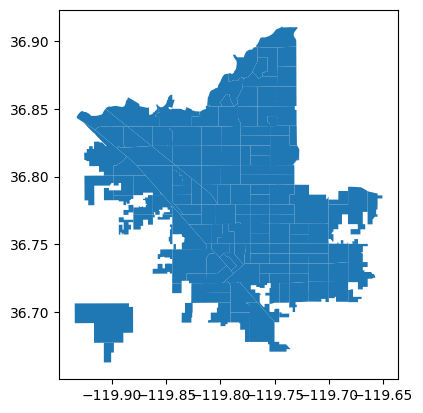

In [57]:
fresno.plot()

In [58]:
# fresno.to_file('./data/output/fresno_acs/fresno_acs.shp')

###  Bus Stops

In [59]:
bus_stops = gpd.read_file('./data/bus_stops.geojson')

bus_stops.head()

,ObjectID,StopID,StopCode,StopName,StopDescription,StopLatitiude,StopLongtitude,WheelchairBoarding,geometry
0,13649,5,5,NE BRAWLEY - SHIELDS,N BRAWLEY AVE & W FOUNTAIN WAY,36.8,-119.9,0,POINT (-119.86225 36.77959)
1,13650,6,6,SE SHAW - BRAWLEY,W SHAW AVE & N BRAWLEY AVE,36.8,-119.9,0,POINT (-119.86222 36.80815)
2,13651,7,7,SW SHAW - WEST,W SHAW AVE & N WEST AVE,36.8,-119.8,0,POINT (-119.82682 36.80825)
3,13652,8,8,SE SHAW - BLACKSTONE,E SHAW AVE & N BLACKSTONE AVE,36.8,-119.8,0,POINT (-119.79007 36.8085)
4,13653,9,9,SE SHAW - FIRST,E SHAW AVE & N FIRST ST,36.8,-119.8,0,POINT (-119.77195 36.80854)


In [60]:
bus_stops['WheelchairBoarding'].unique()

array(['0'], dtype=object)

In [61]:
bus_stops.StopName.nunique()

1476

<Axes: >

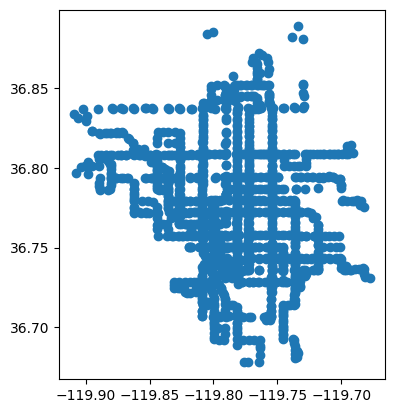

In [62]:
bus_stops.plot()

In [63]:
bus_stops = bus_stops.rename(columns={
    'StopDescription': 'StopDesc',
    'StopLatitiude': 'Latitude',
    'StopLongtitude': 'Longitude',
    'WheelchairBoarding': 'Wheelchair'
})

In [64]:
bus_stops.head()

,ObjectID,StopID,StopCode,StopName,StopDesc,Latitude,Longitude,Wheelchair,geometry
0,13649,5,5,NE BRAWLEY - SHIELDS,N BRAWLEY AVE & W FOUNTAIN WAY,36.8,-119.9,0,POINT (-119.86225 36.77959)
1,13650,6,6,SE SHAW - BRAWLEY,W SHAW AVE & N BRAWLEY AVE,36.8,-119.9,0,POINT (-119.86222 36.80815)
2,13651,7,7,SW SHAW - WEST,W SHAW AVE & N WEST AVE,36.8,-119.8,0,POINT (-119.82682 36.80825)
3,13652,8,8,SE SHAW - BLACKSTONE,E SHAW AVE & N BLACKSTONE AVE,36.8,-119.8,0,POINT (-119.79007 36.8085)
4,13653,9,9,SE SHAW - FIRST,E SHAW AVE & N FIRST ST,36.8,-119.8,0,POINT (-119.77195 36.80854)


In [65]:
col6 = ['StopID', 'StopName', 'StopDesc', 'Wheelchair']

In [66]:
bus_stops = bus_stops[col6 + ['geometry']]

In [67]:
bus_stops.head()

,StopID,StopName,StopDesc,Wheelchair,geometry
0,5,NE BRAWLEY - SHIELDS,N BRAWLEY AVE & W FOUNTAIN WAY,0,POINT (-119.86225 36.77959)
1,6,SE SHAW - BRAWLEY,W SHAW AVE & N BRAWLEY AVE,0,POINT (-119.86222 36.80815)
2,7,SW SHAW - WEST,W SHAW AVE & N WEST AVE,0,POINT (-119.82682 36.80825)
3,8,SE SHAW - BLACKSTONE,E SHAW AVE & N BLACKSTONE AVE,0,POINT (-119.79007 36.8085)
4,9,SE SHAW - FIRST,E SHAW AVE & N FIRST ST,0,POINT (-119.77195 36.80854)


In [68]:
bus_stops.Wheelchair.value_counts()

Wheelchair
0    1517
Name: count, dtype: int64

In [69]:
# bus_stops.to_file('./data/output/bus_stops/bus_stops.shp')

### Transit Stops

In [70]:
transit_stops = gpd.read_file('./data/transit_stops.geojson')

transit_stops.head()

,OBJECTID,org_id,agency,route_id,route_type,stop_id,stop_name,base64_url,geometry
0,1,recNaKvzVQhGX1puu,City of Alhambra,BlueLine,3,2619798,Chapel Ave & Bay St,aHR0cHM6Ly93d3cuY2l0eW9mYWxoYW1icmEub3JnL0RvY3...,POINT (-118.12232 34.09485)
1,2,recNaKvzVQhGX1puu,City of Alhambra,BlueLine,3,2619799,Chapel Ave & Main St,aHR0cHM6Ly93d3cuY2l0eW9mYWxoYW1icmEub3JnL0RvY3...,POINT (-118.12338 34.09636)
2,3,recNaKvzVQhGX1puu,City of Alhambra,BlueLine,3,2619802,Chapel Ave & Woodward Ave,aHR0cHM6Ly93d3cuY2l0eW9mYWxoYW1icmEub3JnL0RvY3...,POINT (-118.12529 34.09908)
3,4,recNaKvzVQhGX1puu,City of Alhambra,BlueLine,3,2619804,Woodward Ave & Garfield Ave,aHR0cHM6Ly93d3cuY2l0eW9mYWxoYW1icmEub3JnL0RvY3...,POINT (-118.12824 34.0979)
4,5,recNaKvzVQhGX1puu,City of Alhambra,BlueLine,3,2619807,Garfield Ave & Main St,aHR0cHM6Ly93d3cuY2l0eW9mYWxoYW1icmEub3JnL0RvY3...,POINT (-118.12705 34.0953)


In [71]:
transit_stops.route_type.unique()

# 0 - Tram, Streetcar, Light rail
# 1 - Subway, Metro
# 2 - Rail
# 3 - Bus
# 4 - Ferry
# 5 - Cable tram

array(['3', '2', '4', '1', '5', '0'], dtype=object)

In [72]:
fresno_stops = transit_stops[transit_stops['agency'] == 'City of Fresno'].reset_index(drop=True)

fresno_stops.head()

,OBJECTID,org_id,agency,route_id,route_type,stop_id,stop_name,base64_url,geometry
0,45502,rec0bKUhHAajTNIlf,City of Fresno,3854,3,1005,SIERRA STATION,aHR0cHM6Ly9naXM0dS5mcmVzbm8uZ292L2Rvd25sb2Fkcy...,POINT (-119.79048 36.82986)
1,45503,rec0bKUhHAajTNIlf,City of Fresno,3854,3,1009,BARSTOW STATION,aHR0cHM6Ly9naXM0dS5mcmVzbm8uZ292L2Rvd25sb2Fkcy...,POINT (-119.79059 36.81513)
2,45504,rec0bKUhHAajTNIlf,City of Fresno,3854,3,1017,ASHLAN STATION,aHR0cHM6Ly9naXM0dS5mcmVzbm8uZ292L2Rvd25sb2Fkcy...,POINT (-119.79068 36.7937)
3,45505,rec0bKUhHAajTNIlf,City of Fresno,3854,3,1018,GRIFFITH STATION,aHR0cHM6Ly9naXM0dS5mcmVzbm8uZ292L2Rvd25sb2Fkcy...,POINT (-119.7907 36.79015)
4,45506,rec0bKUhHAajTNIlf,City of Fresno,3854,3,1023,WELDON STATION,aHR0cHM6Ly9naXM0dS5mcmVzbm8uZ292L2Rvd25sb2Fkcy...,POINT (-119.79058 36.76825)


In [73]:
fresno_stops.route_type.value_counts()

route_type
3    1657
Name: count, dtype: int64

In [74]:
fresno_stops.columns.values

array(['OBJECTID', 'org_id', 'agency', 'route_id', 'route_type',
       'stop_id', 'stop_name', 'base64_url', 'geometry'], dtype=object)

In [75]:
col9 = ['agency', 'route_id', 'route_type', 'stop_id', 'stop_name']

In [76]:
fresno_stops = fresno_stops[col9 + ['geometry']]

fresno_stops.head()

,agency,route_id,route_type,stop_id,stop_name,geometry
0,City of Fresno,3854,3,1005,SIERRA STATION,POINT (-119.79048 36.82986)
1,City of Fresno,3854,3,1009,BARSTOW STATION,POINT (-119.79059 36.81513)
2,City of Fresno,3854,3,1017,ASHLAN STATION,POINT (-119.79068 36.7937)
3,City of Fresno,3854,3,1018,GRIFFITH STATION,POINT (-119.7907 36.79015)
4,City of Fresno,3854,3,1023,WELDON STATION,POINT (-119.79058 36.76825)


In [77]:
# fresno_stops.to_file('./data/output/fresno_stops/fresno_stops.shp')

### Transit Routes

In [78]:
transit_routes = gpd.read_file('./data/transit_routes.geojson')

In [79]:
transit_routes.head()

,OBJECTID,org_id,agency,route_id,route_type,route_name,shape_id,n_trips,base64_url,Shape_Length,geometry
0,1,recNaKvzVQhGX1puu,City of Alhambra,BlueLine,3,Blue Line,p_901543,17.0,aHR0cHM6Ly93d3cuY2l0eW9mYWxoYW1icmEub3JnL0RvY3...,0.1,"MULTILINESTRING ((-118.16836 34.06329, -118.16..."
1,2,recNaKvzVQhGX1puu,City of Alhambra,BlueLine,3,Blue Line,p_901544,18.0,aHR0cHM6Ly93d3cuY2l0eW9mYWxoYW1icmEub3JnL0RvY3...,0.1,"MULTILINESTRING ((-118.12344 34.09633, -118.12..."
2,3,recNaKvzVQhGX1puu,City of Alhambra,GreenLine,3,Green Line,p_901545,33.0,aHR0cHM6Ly93d3cuY2l0eW9mYWxoYW1icmEub3JnL0RvY3...,0.1,"MULTILINESTRING ((-118.1113 34.07941, -118.111..."
3,4,recNaKvzVQhGX1puu,City of Alhambra,GreenLine,3,Green Line,p_901546,33.0,aHR0cHM6Ly93d3cuY2l0eW9mYWxoYW1icmEub3JnL0RvY3...,0.1,"MULTILINESTRING ((-118.1116 34.07916, -118.111..."
4,5,recSBFiK95hJnJuYx,Amador Regional Transit System,569,3,Sacramento,p_859,2.0,aHR0cHM6Ly9kYXRhLnRyaWxsaXVtdHJhbnNpdC5jb20vZ3...,0.8,"MULTILINESTRING ((-120.80805 38.38004, -120.80..."


In [80]:
transit_routes.agency.unique()

array(['City of Alhambra', 'Amador Regional Transit System',
       'Anaheim Transportation Network',
       'Antelope Valley Transit Authority', 'City of Arcadia',
       'City of Arvin', 'City of Auburn', 'City of Baldwin Park',
       'City of Banning', 'Alameda-Contra Costa Transit District',
       'San Joaquin Regional Rail Commission',
       'Angel Island-Tiburon Ferry Company',
       'San Francisco Bay Area Rapid Transit District',
       'Peninsula Corridor Joint Powers Board',
       'Capitol Corridor Joint Powers Authority', 'City of Menlo Park',
       'Central Contra Costa Transit Authority',
       'Dumbarton Bridge Regional Operations Consortium',
       'Emeryville Transportation Management Agency', 'City of Fairfield',
       'Golden Gate Bridge, Highway and Transportation District',
       'Mountain View Transportation Management Association',
       'Marin County Transit District',
       'Mission Bay Transportation Management Agency',
       'City and County of Sa

In [81]:
fresno_routes = transit_routes[transit_routes['agency'] == 'City of Fresno'].reset_index(drop=True)

In [82]:
fresno_routes.head()

,OBJECTID,org_id,agency,route_id,route_type,route_name,shape_id,n_trips,base64_url,Shape_Length,geometry
0,3129,rec0bKUhHAajTNIlf,City of Fresno,3854,3,FAX Q,20613,1.0,aHR0cHM6Ly9naXM0dS5mcmVzbm8uZ292L2Rvd25sb2Fkcy...,0.2,"MULTILINESTRING ((-119.78509 36.85734, -119.78..."
1,3130,rec0bKUhHAajTNIlf,City of Fresno,3854,3,FAX Q,20614,80.0,aHR0cHM6Ly9naXM0dS5mcmVzbm8uZ292L2Rvd25sb2Fkcy...,0.2,"MULTILINESTRING ((-119.78509 36.85734, -119.78..."
2,3131,rec0bKUhHAajTNIlf,City of Fresno,3854,3,FAX Q,20615,3.0,aHR0cHM6Ly9naXM0dS5mcmVzbm8uZ292L2Rvd25sb2Fkcy...,0.1,"MULTILINESTRING ((-119.79022 36.7356, -119.789..."
3,3132,rec0bKUhHAajTNIlf,City of Fresno,3854,3,FAX Q,20616,1.0,aHR0cHM6Ly9naXM0dS5mcmVzbm8uZ292L2Rvd25sb2Fkcy...,0.2,"MULTILINESTRING ((-119.6964 36.7361, -119.6965..."
4,3133,rec0bKUhHAajTNIlf,City of Fresno,3854,3,FAX Q,20617,2.0,aHR0cHM6Ly9naXM0dS5mcmVzbm8uZ292L2Rvd25sb2Fkcy...,0.1,"MULTILINESTRING ((-119.79022 36.7356, -119.790..."


<Axes: >

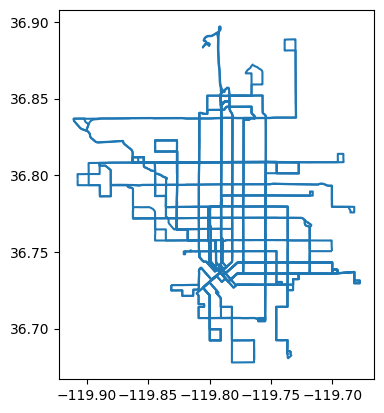

In [83]:
fresno_routes.plot()

In [84]:
fresno_routes.columns.values

array(['OBJECTID', 'org_id', 'agency', 'route_id', 'route_type',
       'route_name', 'shape_id', 'n_trips', 'base64_url', 'Shape_Length',
       'geometry'], dtype=object)

In [85]:
col7 = ['agency', 'route_id', 'route_name', 'n_trips']

In [86]:
routes = fresno_routes[col7 + ['geometry']]

In [87]:
routes = routes.to_file('./data/output/transit_routes/transit_routes.shp')

### Streets

In [88]:
fresno_streets = gpd.read_file('./data/streets.geojson')

In [89]:
fresno_streets.head()

,ObjectID,Label,Direction,RoadName,RoadType,OneWay,GP_Circulation,RoadClassification,LeftFrom,LeftTo,RightFrom,RightTo,geometry
0,2,N Marks Ave,N,Marks,Ave,None,0.0,Frontage,NaN,NaN,NaN,NaN,"LINESTRING (-119.84421 36.80352, -119.84422 36..."
1,3,E Rialto Ave,E,Rialto,Ave,None,0.0,Other,1101.0,1299.0,1100.0,1298.0,"LINESTRING (-119.79725 36.80306, -119.79499 36..."
2,4,Alluvial Ave,None,Alluvial,Ave,None,0.0,Other,1701.0,1799.0,1700.0,1798.0,"LINESTRING (-119.68408 36.84473, -119.68259 36..."
3,5,N Fruit Ave,N,Fruit,Ave,None,8.0,Collector,6101.0,6149.0,6100.0,6148.0,"LINESTRING (-119.81737 36.82465, -119.81737 36..."
4,6,N Locan Ave,N,Locan,Ave,None,0.0,Other,1400.0,1427.0,5000.0,5171.0,"LINESTRING (-119.65501 36.80841, -119.655 36.8..."


<Axes: >

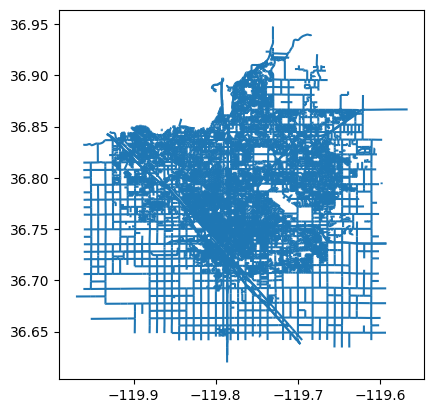

In [90]:
fresno_streets.plot()

In [91]:
fresno_geom = fresno_acs.geometry

fresno_geom = gpd.GeoDataFrame(fresno_geom)

In [92]:
streets = gpd.sjoin(fresno_streets, fresno_geom, how='inner', predicate='intersects').drop(columns=['index_right'])

<Axes: >

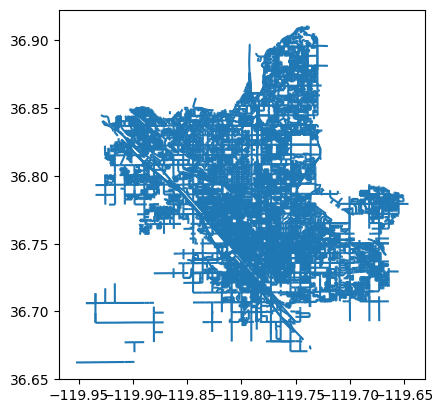

In [93]:
streets.plot()

In [94]:
streets = streets.rename(columns={
    'Label': 'Address',
    'RoadClassification': 'Class'
})

In [95]:
streets.columns.values

array(['ObjectID', 'Address', 'Direction', 'RoadName', 'RoadType',
       'OneWay', 'GP_Circulation', 'Class', 'LeftFrom', 'LeftTo',
       'RightFrom', 'RightTo', 'geometry'], dtype=object)

In [96]:
col8 = ['Address', 'RoadName', 'RoadType', 'Class']

In [97]:
streets = streets[col8 + ['geometry']]

In [98]:
streets.head()

,Address,RoadName,RoadType,Class,geometry
0,N Marks Ave,Marks,Ave,Frontage,"LINESTRING (-119.84421 36.80352, -119.84422 36..."
1,E Rialto Ave,Rialto,Ave,Other,"LINESTRING (-119.79725 36.80306, -119.79499 36..."
3,N Fruit Ave,Fruit,Ave,Collector,"LINESTRING (-119.81737 36.82465, -119.81737 36..."
3,N Fruit Ave,Fruit,Ave,Collector,"LINESTRING (-119.81737 36.82465, -119.81737 36..."
6,N Arthur Ave,Arthur,Ave,Other,"LINESTRING (-119.81455 36.81921, -119.81454 36..."


In [99]:
streets = streets.to_file('./data/output/streets/streets.shp')

### Spatial Join

In [100]:
transit = gpd.read_file('./data/fresno_transit/fresno_transit.shp')

transit.head()

,Join_Count,TARGET_FID,agency,route_id,route_type,stop_id,stop_name,StopID,StopName,StopDesc,Wheelchair,geometry
0,1,0,City of Fresno,3854,3,1005,SIERRA STATION,1005,SIERRA STATION,None,0,POINT (-119.79048 36.82986)
1,1,1,City of Fresno,3854,3,1009,BARSTOW STATION,1009,BARSTOW STATION,None,0,POINT (-119.79059 36.81513)
2,1,2,City of Fresno,3854,3,1017,ASHLAN STATION,1017,ASHLAN STATION,None,0,POINT (-119.79068 36.7937)
3,1,3,City of Fresno,3854,3,1018,GRIFFITH STATION,1018,GRIFFITH STATION,None,0,POINT (-119.7907 36.79015)
4,1,4,City of Fresno,3854,3,1023,WELDON STATION,1023,WELDON STATION,N BLACKSTONE AVE & E WELDON AVE,0,POINT (-119.79058 36.76825)


In [101]:
transit.dtypes

Join_Count       int64
TARGET_FID       int64
agency          object
route_id        object
route_type      object
stop_id         object
stop_name       object
StopID          object
StopName        object
StopDesc        object
Wheelchair      object
geometry      geometry
dtype: object

In [102]:
transit.columns.values

array(['Join_Count', 'TARGET_FID', 'agency', 'route_id', 'route_type',
       'stop_id', 'stop_name', 'StopID', 'StopName', 'StopDesc',
       'Wheelchair', 'geometry'], dtype=object)

In [103]:
col9 = ['agency', 'route_id', 'route_type', 'StopID', 'StopName', 'StopDesc', 'Wheelchair']

In [104]:
stops = transit[col9 + ['geometry']].reset_index(drop=True)

stops.head()

,agency,route_id,route_type,StopID,StopName,StopDesc,Wheelchair,geometry
0,City of Fresno,3854,3,1005,SIERRA STATION,None,0,POINT (-119.79048 36.82986)
1,City of Fresno,3854,3,1009,BARSTOW STATION,None,0,POINT (-119.79059 36.81513)
2,City of Fresno,3854,3,1017,ASHLAN STATION,None,0,POINT (-119.79068 36.7937)
3,City of Fresno,3854,3,1018,GRIFFITH STATION,None,0,POINT (-119.7907 36.79015)
4,City of Fresno,3854,3,1023,WELDON STATION,N BLACKSTONE AVE & E WELDON AVE,0,POINT (-119.79058 36.76825)


In [105]:
stops['StopDesc'] = stops['StopDesc'].fillna(0)

stops.head()

,agency,route_id,route_type,StopID,StopName,StopDesc,Wheelchair,geometry
0,City of Fresno,3854,3,1005,SIERRA STATION,0,0,POINT (-119.79048 36.82986)
1,City of Fresno,3854,3,1009,BARSTOW STATION,0,0,POINT (-119.79059 36.81513)
2,City of Fresno,3854,3,1017,ASHLAN STATION,0,0,POINT (-119.79068 36.7937)
3,City of Fresno,3854,3,1018,GRIFFITH STATION,0,0,POINT (-119.7907 36.79015)
4,City of Fresno,3854,3,1023,WELDON STATION,N BLACKSTONE AVE & E WELDON AVE,0,POINT (-119.79058 36.76825)


In [106]:
# stops = stops.to_file('./data/output/stops/stops.shp')